# Taco-Burrito Restaurants EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 500

In [6]:
data = pd.read_csv('taco_burritos.csv', na_values=r'\N')

In [7]:
n_rows, n_cols = data.shape
n_sample = 5
print(f'There are {n_rows} rows and {n_cols} columns.')
print(f'The first {n_sample} rows are listed below.')
data.head()

There are 77260 rows and 26 columns.
The first 5 rows are listed below.


id                   address  \
0  AVwc__cikufWRAb51QjV         610 Commercial St   
1  AVwc__cikufWRAb51QjV         610 Commercial St   
2  AVwc__dF_7pvs4fz1Ncy      9521 Morton Davis Dr   
3  AVwc__kCByjofQCxkdm-  10550 W I 25 Frontage Rd   
4  AVwc__WtByjofQCxkdkR             8495 W 3rd St   

                                          categories         city country  \
0  Restaurant Delivery Service,Restaurants,Pizza,...     Atchison      US   
1  Restaurant Delivery Service,Restaurants,Pizza,...     Atchison      US   
2       Golf Course, American Restaurant, and Resort    Patterson      US   
3                               Fast Food Restaurant     Longmont      US   
4  Mexican Restaurant Mid-City West,Mexican Resta...  Los Angeles      US   

                      cuisines             dateAdded           dateUpdated  \
0  Restaurant Delivery Service  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z   
1  Restaurant Delivery Service  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z   
2                          NaN  2016-10-14T01:58:25Z  2016-10-14T01:58:25Z   
3                          NaN  2016-09-09T17:30:34Z  2016-10-04T05:15:17Z   
4                      Mexican  2016-05-19T11:50:25Z  2016-09-11T00:06:37Z   

                                                keys   latitude  ...  \
0          us/ks/atchison/610commercialst/-138126000  39.561570  ...   
1          us/ks/atchison/610commercialst/-138126000  39.561570  ...   
2  us/grayson/patterson/9521mortondavisdr/-522005016  37.401855  ...   
3  us/niwot/longmont/10550wi25frontagerd/-1161002137        NaN  ...   
4   us/bicentennial/losangeles/8495w3rdst/-251199537  34.080724  ...   

         menus.dateSeen                                  menus.description  \
0  2017-02-01T18:04:44Z                                                NaN   
1  2016-03-02T11:49:34Z  Beef, onion, cheddar cheese, lettuce,  refried...   
2  2016-10-14T01:58:25Z  Beef barbacoa or chicken, spanish rice, pico d...   
3  2016-09-09T17:30:34Z                                                NaN   
4  2016-05-19T11:50:25Z  Wahoo, avocado, cabbage, pico de gallo  and av...   

          menus.name                               name postalCode  \
0               Taco                    Gambino's Pizza      66002   
1               Taco                    Gambino's Pizza      66002   
2   Smotherd Burrito  Diablo Grande Golf & Country Club      95363   
3    Sausage Burrito                         Mcdonald's      80504   
4  Wahoo Tacogrilled           Baja Fresh Mexican Grill      90048   

  priceRangeCurrency priceRangeMin priceRangeMax      province  \
0                NaN           NaN           NaN            KS   
1                NaN           NaN           NaN            KS   
2                NaN           NaN           NaN       Grayson   
3                NaN           NaN           NaN         Niwot   
4                USD           0.0          25.0  Bicentennial   

                       websites  
0  http://www.gambinospizza.com  
1  http://www.gambinospizza.com  
2  http://www.diablogrande.com/  
3          http://mcdonalds.com  
4          http://bajafresh.com  

[5 rows x 26 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77260 entries, 0 to 77259
Data columns (total 26 columns):
id                    77260 non-null object
address               77260 non-null object
categories            77260 non-null object
city                  77260 non-null object
country               77260 non-null object
cuisines              38384 non-null object
dateAdded             77260 non-null object
dateUpdated           77260 non-null object
keys                  77260 non-null object
latitude              55636 non-null float64
longitude             55636 non-null float64
menuPageURL           10054 non-null object
menus.amountMax       40260 non-null float64
menus.amountMin       40260 non-null float64
menus.category        3729 non-null object
menus.currency        40511 non-null object
menus.dateSeen        77260 non-null object
menus.description     29323 non-null object
menus.name            77260 non-null object
name                  77257 non-null object
postalCo

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

83117


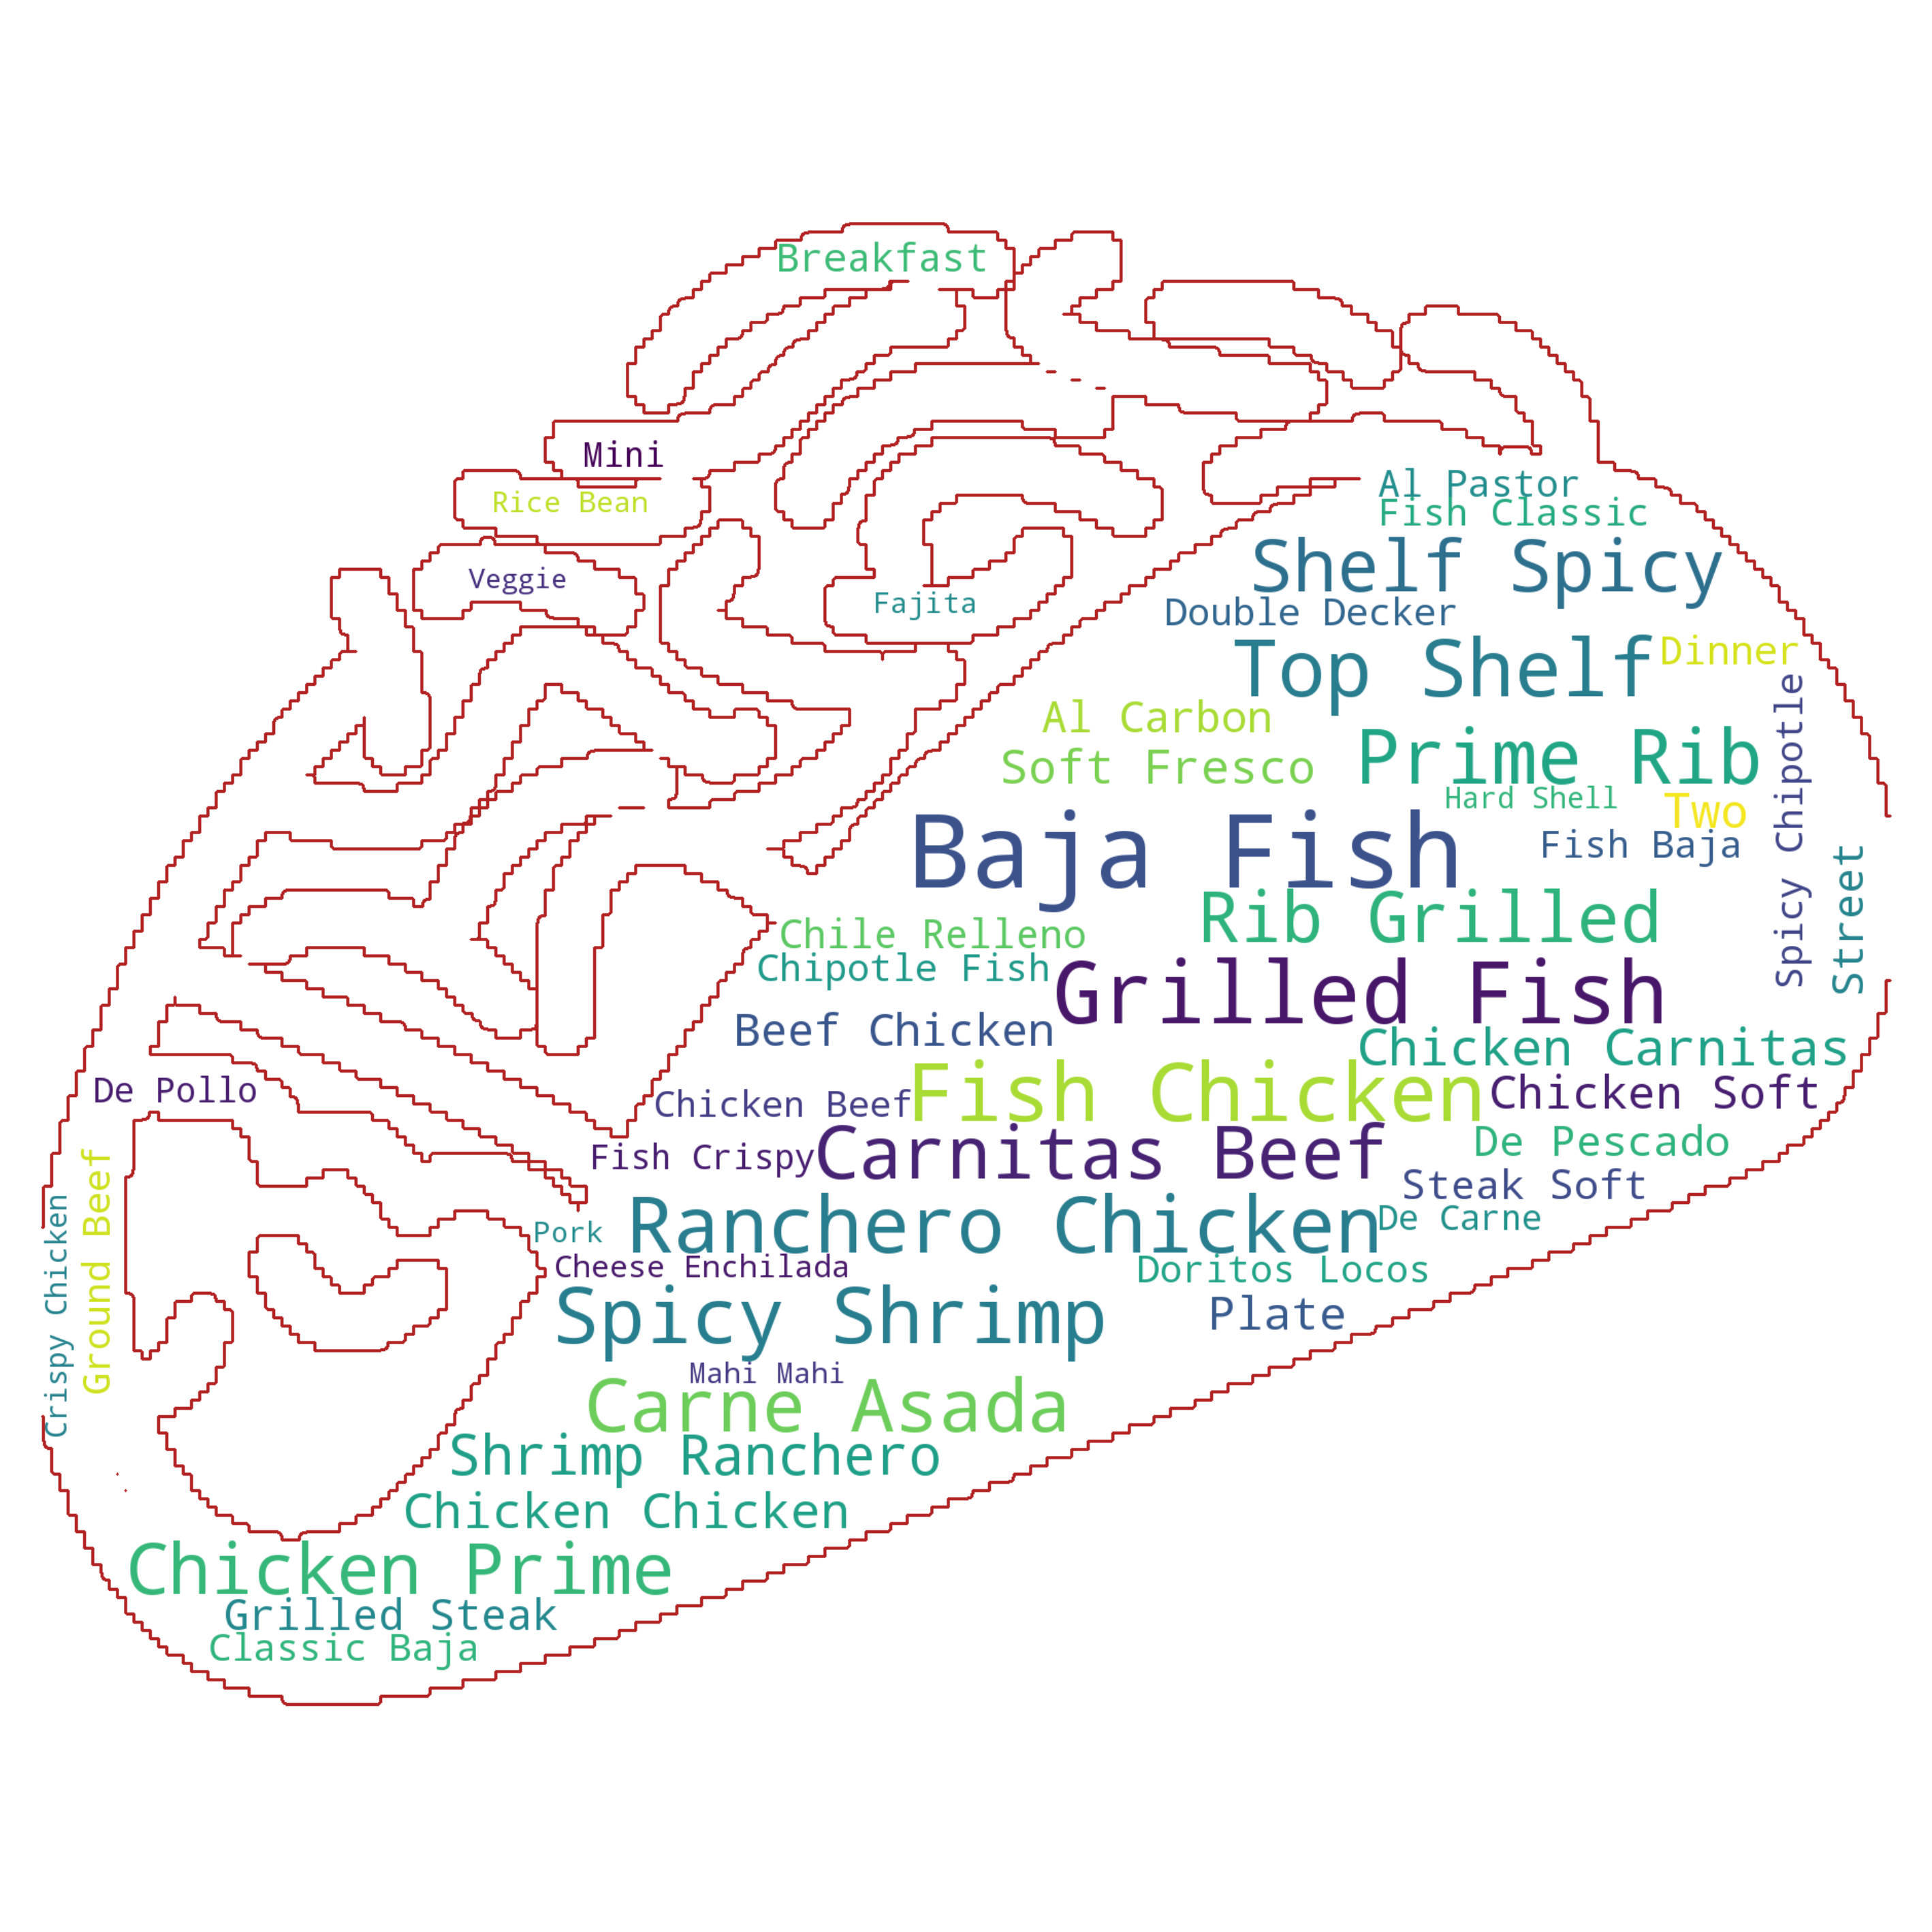

In [64]:
# word stats
words = []
for name in data['menus.name']:
    if 'taco' in name.lower():
        words = words + name.split(' ')
words_clean = [w for w in words if not 'taco' in w.lower()]
print(len(words_clean))

taco_mask = np.array(Image.open("taco_mask.png"))

stopwords = set(STOPWORDS)
stopwords.update(["taco", "Taco"])
wordcloud = WordCloud(
    stopwords=stopwords, max_font_size=100, max_words=50, background_color="white",
    mask=taco_mask, contour_width=3, contour_color='firebrick'
).generate(' '.join(words_clean))
wordcloud.to_file("wc_taco.png")
plt.figure(figsize=[8,6], dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

67903


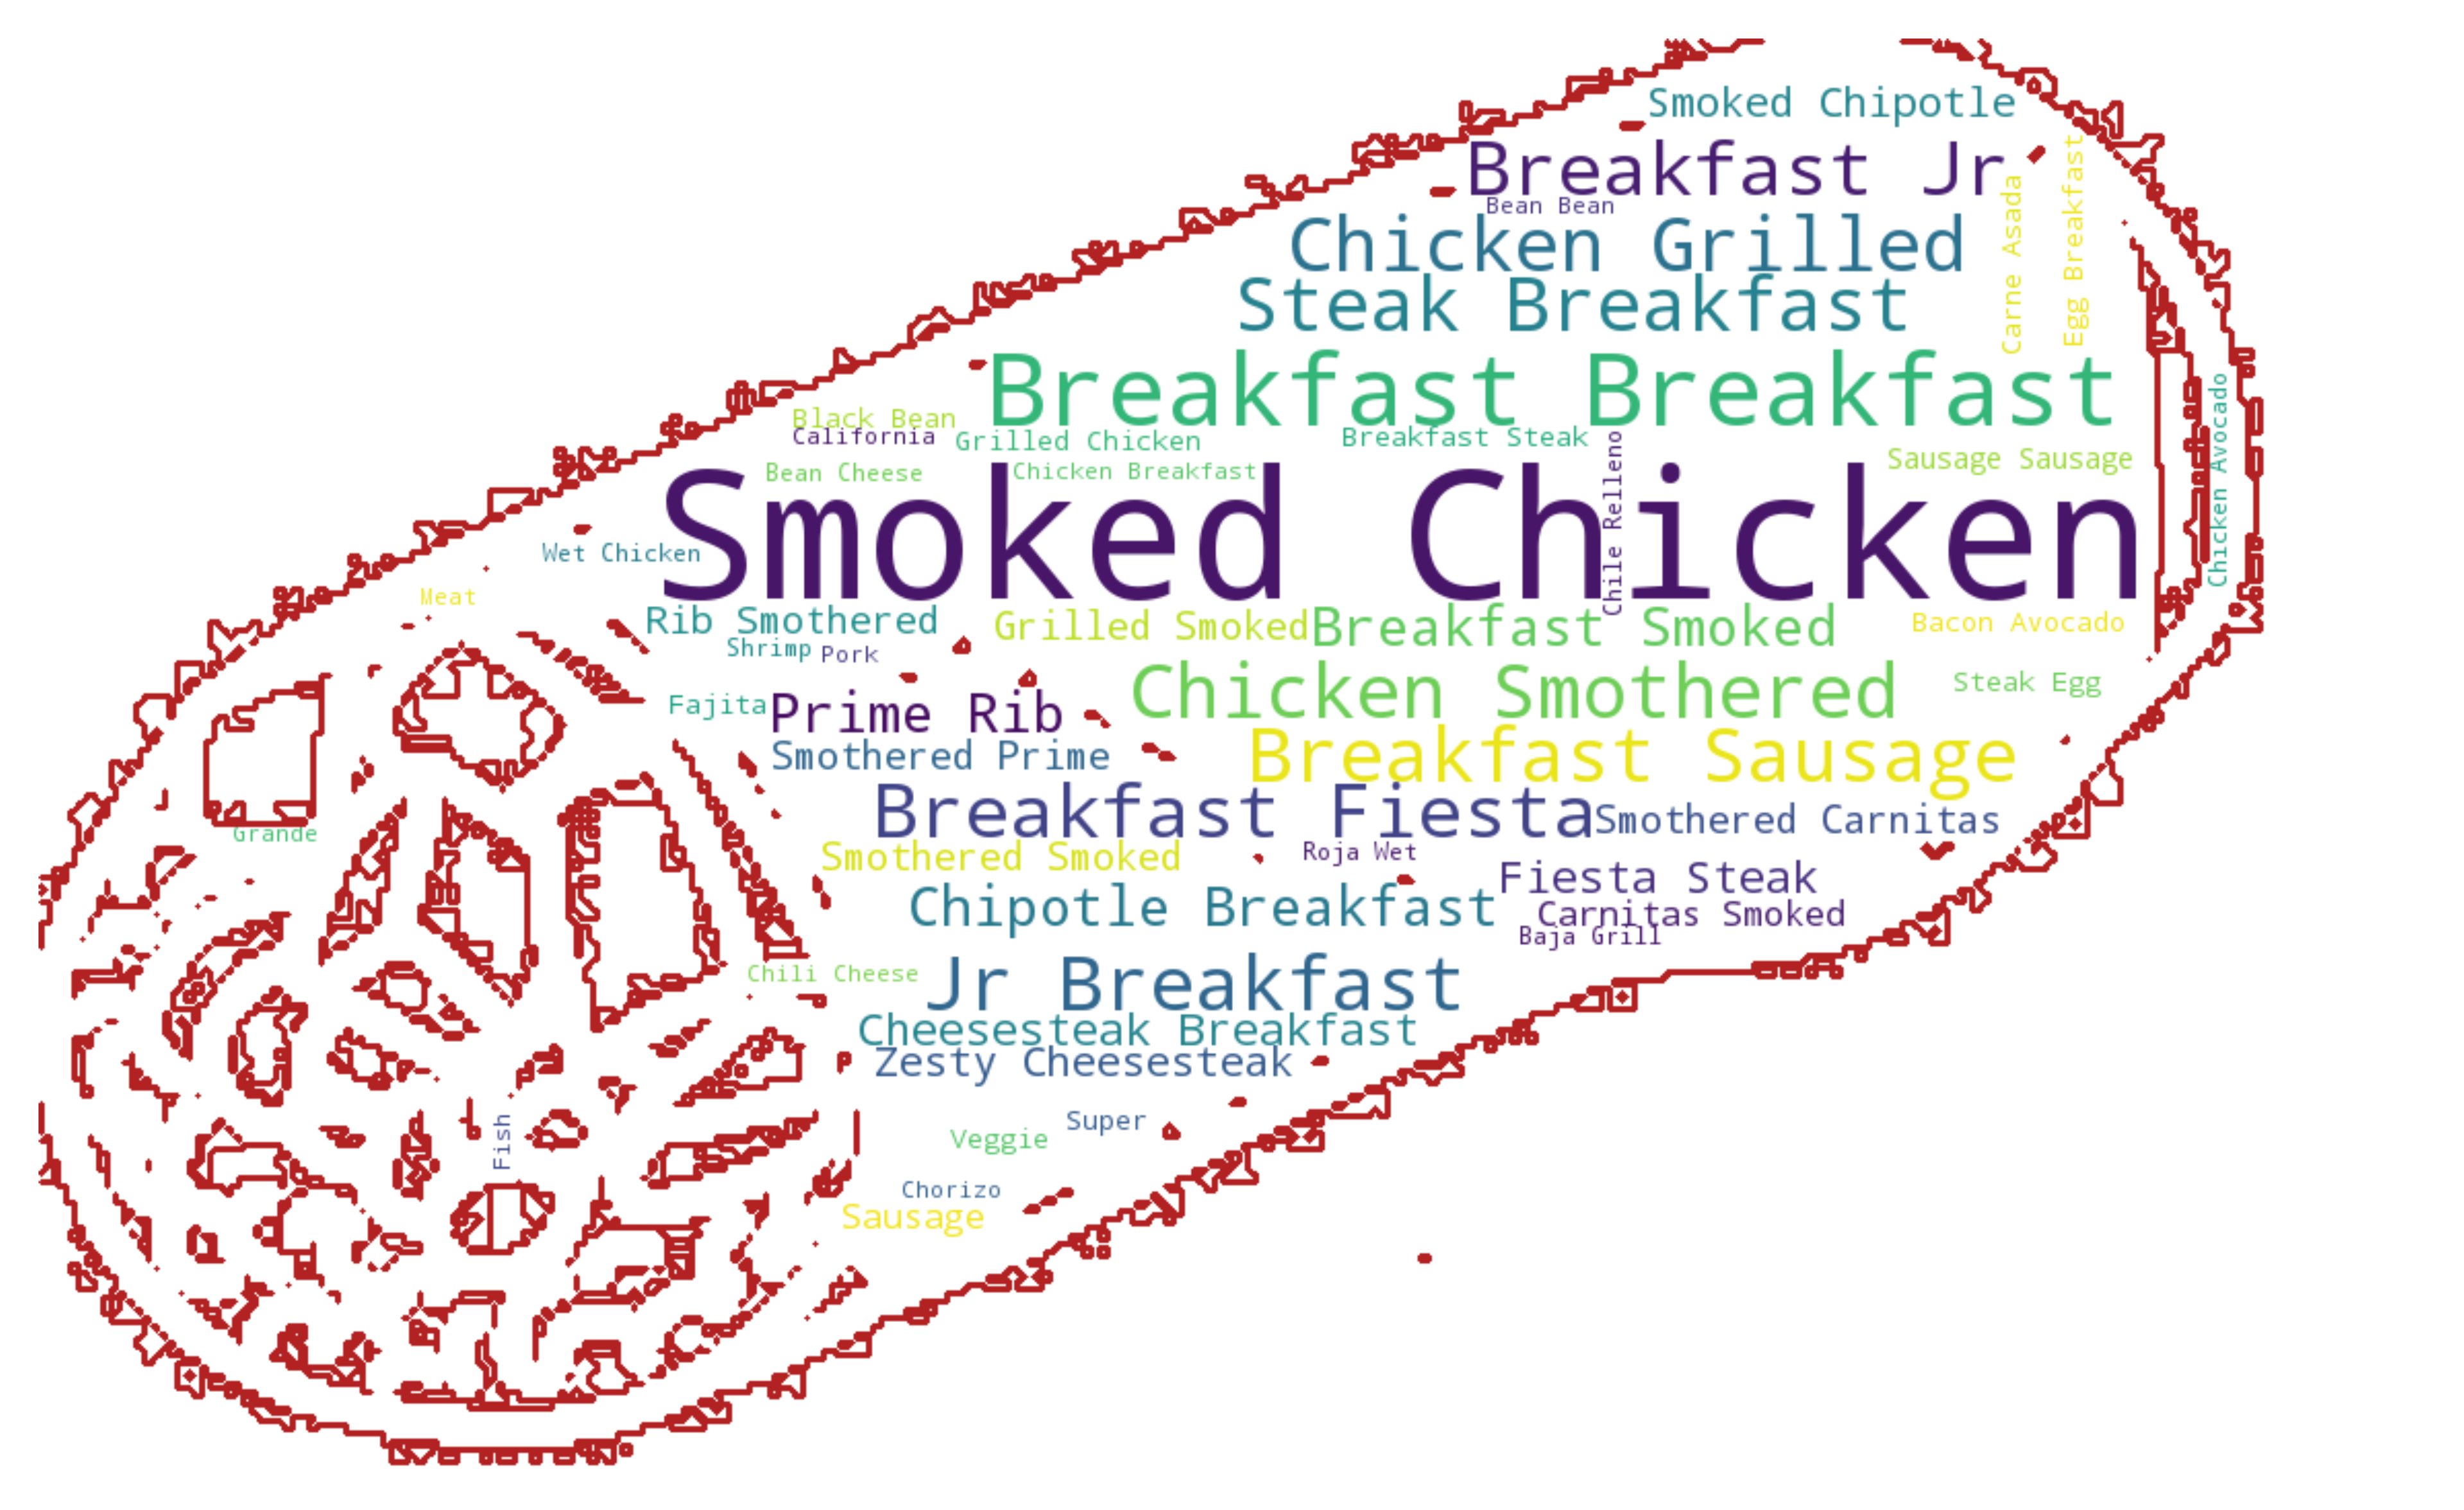

In [67]:
# word stats
words = []
for name in data['menus.name']:
    if 'burrito' in name.lower():
        words = words + name.split(' ')
words_clean = [w for w in words if not 'burrito' in w.lower()]
print(len(words_clean))

burrito_mask = np.array(Image.open("burrito_mask.png"))

stopwords = set(STOPWORDS)
stopwords.update(["burrito", "Burrito"])
wordcloud = WordCloud(
    stopwords=stopwords, max_font_size=100, max_words=50, background_color="white",
    mask=burrito_mask, contour_width=3, contour_color='firebrick'
).generate(' '.join(words_clean))
wordcloud.to_file("wc_burrito.png")
plt.figure(figsize=[8,6], dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
# detect and remove all-empty columns
non_empty_cols = []
for i in range(n_cols):
    if data.iloc[:, i].isna().sum() < n_rows:
        non_empty_cols.append(data.columns[i])
print(f'There are {len(non_empty_cols)} non-empty columns.')
pd.DataFrame(non_empty_cols, columns=['column'])

There are 26 non-empty columns.


column
0                   id
1              address
2           categories
3                 city
4              country
5             cuisines
6            dateAdded
7          dateUpdated
8                 keys
9             latitude
10           longitude
11         menuPageURL
12     menus.amountMax
13     menus.amountMin
14      menus.category
15      menus.currency
16      menus.dateSeen
17   menus.description
18          menus.name
19                name
20          postalCode
21  priceRangeCurrency
22       priceRangeMin
23       priceRangeMax
24            province
25            websites

#### strip all-empty columns from the original data

In [86]:
data = data.loc[:, non_empty_cols]
#data.to_csv('taco_burritos.csv', index=False)
data.head()

id                   address  \
0  AVwc__cikufWRAb51QjV         610 Commercial St   
1  AVwc__cikufWRAb51QjV         610 Commercial St   
2  AVwc__dF_7pvs4fz1Ncy      9521 Morton Davis Dr   
3  AVwc__kCByjofQCxkdm-  10550 W I 25 Frontage Rd   
4  AVwc__WtByjofQCxkdkR             8495 W 3rd St   

                                          categories         city country  \
0  Restaurant Delivery Service,Restaurants,Pizza,...     Atchison      US   
1  Restaurant Delivery Service,Restaurants,Pizza,...     Atchison      US   
2       Golf Course, American Restaurant, and Resort    Patterson      US   
3                               Fast Food Restaurant     Longmont      US   
4  Mexican Restaurant Mid-City West,Mexican Resta...  Los Angeles      US   

                      cuisines             dateAdded           dateUpdated  \
0  Restaurant Delivery Service  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z   
1  Restaurant Delivery Service  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z   
2                          NaN  2016-10-14T01:58:25Z  2016-10-14T01:58:25Z   
3                          NaN  2016-09-09T17:30:34Z  2016-10-04T05:15:17Z   
4                      Mexican  2016-05-19T11:50:25Z  2016-09-11T00:06:37Z   

                                                keys   latitude  ...  \
0          us/ks/atchison/610commercialst/-138126000  39.561570  ...   
1          us/ks/atchison/610commercialst/-138126000  39.561570  ...   
2  us/grayson/patterson/9521mortondavisdr/-522005016  37.401855  ...   
3  us/niwot/longmont/10550wi25frontagerd/-1161002137        NaN  ...   
4   us/bicentennial/losangeles/8495w3rdst/-251199537  34.080724  ...   

         menus.dateSeen                                  menus.description  \
0  2017-02-01T18:04:44Z                                                NaN   
1  2016-03-02T11:49:34Z  Beef, onion, cheddar cheese, lettuce,  refried...   
2  2016-10-14T01:58:25Z  Beef barbacoa or chicken, spanish rice, pico d...   
3  2016-09-09T17:30:34Z                                                NaN   
4  2016-05-19T11:50:25Z  Wahoo, avocado, cabbage, pico de gallo  and av...   

          menus.name                               name postalCode  \
0               Taco                    Gambino's Pizza      66002   
1               Taco                    Gambino's Pizza      66002   
2   Smotherd Burrito  Diablo Grande Golf & Country Club      95363   
3    Sausage Burrito                         Mcdonald's      80504   
4  Wahoo Tacogrilled           Baja Fresh Mexican Grill      90048   

  priceRangeCurrency priceRangeMin priceRangeMax      province  \
0                NaN           NaN           NaN            KS   
1                NaN           NaN           NaN            KS   
2                NaN           NaN           NaN       Grayson   
3                NaN           NaN           NaN         Niwot   
4                USD           0.0          25.0  Bicentennial   

                       websites  
0  http://www.gambinospizza.com  
1  http://www.gambinospizza.com  
2  http://www.diablogrande.com/  
3          http://mcdonalds.com  
4          http://bajafresh.com  

[5 rows x 26 columns]

In [82]:
data[data['id'] == 'AVzRFQMZ3D1zeR_xBVWs']

id         address  categories           city  \
77199  AVzRFQMZ3D1zeR_xBVWs  2330 Taylor St  Restaurant  San Francisco   

      country                                           cuisines  \
77199      US  American,Cafe,Vegetarian Friendly,Gluten Free ...   

                  dateAdded           dateUpdated  \
77199  2017-06-22T18:33:54Z  2017-06-22T18:35:12Z   

                                                    keys  latitude  ...  \
77199  us/california/sanfrancisco/2330taylorst/124500...    37.804  ...   

                                          menus.dateSeen  \
77199  2017-06-22T16:26:52.050Z,2017-06-22T16:52:23.1...   

                                       menus.description   menus.name  \
77199  Bacon, Chorizo or Ham or Sweet Potatoes, Chedd...  Egg Burrito   

             name  postalCode priceRangeCurrency priceRangeMin priceRangeMax  \
77199  Pat's Cafe  94133-1810                NaN           NaN           NaN   

         province websites  
77199  California      NaN  

[1 rows x 26 columns]

In [81]:
# count menu names containing "taco"
filter1a = data['menus.name'].str.contains(' taco')
filter2a = data['menus.name'].str.contains(' tacos')
filter3a = data['menus.name'].str.contains('taco ')
filter4a = data['menus.name'].str.contains('tacos')
filter1b = data['menus.name'].str.contains(' Taco')
filter2b = data['menus.name'].str.contains(' Tacos')
filter3b = data['menus.name'].str.contains('Taco ')
filter4b = data['menus.name'].str.contains('Tacos')
filter5a = ~data['menus.name'].str.contains('salad')
filter5b = ~data['menus.name'].str.contains('Salad')
data[(filter1a | filter2a | filter3a | filter4a | filter1b | filter2b | filter3b | filter4b) & filter5a & filter5b]

(38940, 26)

In [88]:
df_food = data.copy()
filter1a = df_food['menus.name'].str.contains(' taco')
filter2a = df_food['menus.name'].str.contains(' tacos')
filter3a = df_food['menus.name'].str.contains('taco ')
filter4a = df_food['menus.name'].str.contains('tacos')
filter1b = df_food['menus.name'].str.contains(' Taco')
filter2b = df_food['menus.name'].str.contains(' Tacos')
filter3b = df_food['menus.name'].str.contains('Taco ')
filter4b = df_food['menus.name'].str.contains('Tacos')
filter5a = ~df_food['menus.name'].str.contains('salad')
filter5b = ~df_food['menus.name'].str.contains('Salad')
filter6a= ~df_food['menus.name'].str.contains('Octopus')
filter6b= ~df_food['menus.name'].str.contains('octopus')
df_Taco_a=df_food[(filter1a | filter2a | filter3a | filter4a | filter1b | filter2b | filter3b | filter4b) & filter5a & filter5b]
df_Taco_b=df_food[(filter1a | filter2a | filter3a | filter4a | filter1b | filter2b | filter3b | filter4b) & filter5a & filter5b & filter6a & filter6b]
df_Taco_b[['name', 'menus.name']]

name           menus.name
4      Baja Fresh Mexican Grill    Wahoo Tacogrilled
5      Baja Fresh Mexican Grill     Wahoo Tacocrispy
6      Baja Fresh Mexican Grill           Taco Combo
7      Baja Fresh Mexican Grill   Original Baja Taco
14     Baja Fresh Mexican Grill  Americano Soft Taco
...                         ...                  ...
77247         Chevy's Fresh Mex                Tacos
77250        La Casona Taqueria          Veggie Taco
77252        La Casona Taqueria            Tofu Taco
77254        La Casona Taqueria           Super Taco
77257        La Casona Taqueria         Regular Taco

[38911 rows x 2 columns]

In [91]:
sushifilter1=df_Taco_b['categories'].str.contains('Sushi')
sushifilter2a=df_Taco_b['categories'].str.contains('Japanese')
sushifilter3a=df_Taco_b['categories'].str.contains(' Japanese')
res_sushi=df_Taco_b[(sushifilter1|sushifilter2a|sushifilter3a)]
res_sushi[['name', 'menus.name']].head(100)

name  \
71                           Fish Market Maui   
382                              Sushi Planet   
431                           ONYX Restaurant   
562               Soo-woo Japanese Steakhouse   
596                         Sushi House Unico   
597                         Sushi House Unico   
598                         Sushi House Unico   
599                         Sushi House Unico   
1863                                   J Fuji   
1868                                   J Fuji   
1869                                   J Fuji   
1870                                   J Fuji   
2637                             Sushi Garage   
2922                                Umi Sushi   
3130               Yen Sushi Karaoke & Lounge   
3131               Yen Sushi Karaoke & Lounge   
4336                           Tomoyama Sushi   
4360                        Georges Brasserie   
4361                        Georges Brasserie   
4362                        Georges Brasserie   
4882                                   Haruno   
4883                                   Haruno   
5127                                   S@kura   
5159                                  Noribar   
5160                                  Noribar   
5934                              Tokyo House   
6043                          Blue Fish Sushi   
6084                         Naked Fish Sushi   
6883                          Izakaya Akatora   
7418                  Dos Coyotes Border Cafe   
7419                  Dos Coyotes Border Cafe   
7420                  Dos Coyotes Border Cafe   
7422                  Dos Coyotes Border Cafe   
7428                  Dos Coyotes Border Cafe   
7429                  Dos Coyotes Border Cafe   
7434                  Dos Coyotes Border Cafe   
8839                            zen asian bbq   
8929                                  Hayashi   
9672                           Zen Restaurant   
9673                           Zen Restaurant   
9674                           Zen Restaurant   
10443                      Sushi Bar Downtown   
10444                      Sushi Bar Downtown   
10445                      Sushi Bar Downtown   
10724                                  Midori   
10923                         Maru Maki Sushi   
11117                            Sushi Garden   
11890              Cosmo's Restaurant and Bar   
12049                    Koi Koi Sushi & Roll   
12803                     Coral Beach Cantina   
12804                     Coral Beach Cantina   
12806                     Coral Beach Cantina   
12807                     Coral Beach Cantina   
12808                     Coral Beach Cantina   
12809                     Coral Beach Cantina   
13540               Ebisu Japanese Restaurant   
13707                         Red Coral Sushi   
14215                 Nikki's Gourmet & Sushi   
14216                 Nikki's Gourmet & Sushi   
14438                       Enso Japanese Bar   
14524                            Sakura Sushi   
15633               Yokohama Japanese Cuisine   
15751                            Wasabi & Wok   
15842                          Lohas Teriyaki   
15843                          Lohas Teriyaki   
16103  Nikki's Hibachi Steakhouse & Sushi Bar   
16104  Nikki's Hibachi Steakhouse & Sushi Bar   
16550                              Domo Sushi   
16551                              Domo Sushi   
16681                     Kabuki Sushi  Grill   
16684                     Kabuki Sushi  Grill   
17096               Rock & Rolls Sushi Lounge   
17097               Rock & Rolls Sushi Lounge   
18478                         5 Napkin Burger   
18479                         5 Napkin Burger   
18480                         5 Napkin Burger   
18733                             Urban Table   
19473                         The One Sushi +   
19509                The Fish Market San Jose   
19510                The Fish Market San Jose   
19511                The Fish Market San Jose   
19512                Th

In [92]:
bfilter1a = df_food['menus.name'].str.contains(' Burrito')
bfilter2a = df_food['menus.name'].str.contains(' Burritos')
bfilter3a = df_food['menus.name'].str.contains(' burrito')
bfilter4a = df_food['menus.name'].str.contains(' burritos')
bfilter1b = df_food['menus.name'].str.contains('Burrito ')
bfilter2b = df_food['menus.name'].str.contains('Burritos ')
bfilter3b = df_food['menus.name'].str.contains('burrito ')
bfilter4b = df_food['menus.name'].str.contains('burritos ')
df_Burrito=df_food[(bfilter1a | bfilter2a | bfilter3a | bfilter4a | bfilter1b | bfilter2b | bfilter3b | bfilter4b)]
df_Burrito[['name', 'menus.name']]

name                     menus.name
2      Diablo Grande Golf & Country Club               Smotherd Burrito
3                             Mcdonald's                Sausage Burrito
8               Baja Fresh Mexican Grill         Grilled Veggie Burrito
9               Baja Fresh Mexican Grill  Grilled Chicken Salad Burrito
10              Baja Fresh Mexican Grill                 Diablo Burrito
...                                  ...                            ...
77253                 La Casona Taqueria          Tofu Ranchero Burrito
77255                 La Casona Taqueria                  Super Burrito
77256                 La Casona Taqueria       Steamed Broccoli Burrito
77258                 La Casona Taqueria                Regular Burrito
77259                 La Casona Taqueria                 Azteca Burrito

[34334 rows x 2 columns]

In [97]:
nfilter = data['menus.name'].str.contains('(?i)taco|burrito')
data[~nfilter]

Empty DataFrame
Columns: [id, address, categories, city, country, cuisines, dateAdded, dateUpdated, keys, latitude, longitude, menuPageURL, menus.amountMax, menus.amountMin, menus.category, menus.currency, menus.dateSeen, menus.description, menus.name, name, postalCode, priceRangeCurrency, priceRangeMin, priceRangeMax, province, websites]
Index: []

[0 rows x 26 columns]

In [6]:
data_cat_desc = data.describe(include=object)
data_cat_desc

id             address          categories  \
count                  77260               77260               77260   
unique                 19439               18618                8488   
top     AVwch4pVByjofQCxfPyl  3000 N Dinuba Blvd  Mexican Restaurant   
freq                      68                  69               15094   

             city country cuisines             dateAdded  \
count       77260   77260    38384                 77260   
unique       3601       1     1588                 17965   
top     San Diego      US  Mexican  2015-10-23T02:21:55Z   
freq         1924   77260     6280                    79   

                 dateUpdated                                            keys  \
count                  77260                                           77260   
unique                 17675                                           19438   
top     2015-11-02T15:47:29Z  us/or/portland/10090sewashingtonst/-1322134216   
freq                      68                                              68   

                                              menuPageURL menus.category  \
count                                               10054           3729   
unique                                               2600            962   
top     http://www.yellowpages.com/long-beach-ca/mip/e...          Tacos   
freq                                                   53            291   

       menus.currency        menus.dateSeen  \
count           40511                 77260   
unique              2                 18453   
top               USD  2016-04-24T00:00:00Z   
freq            40495                   821   

                                        menus.description         menus.name  \
count                                               29323              77260   
unique                                              15730              15737   
top     Crunchy corn tortilla, spicy beef, american ch...  Breakfast Burrito   
freq                                                 1087               3188   

                       name postalCode priceRangeCurrency province  \
count                 77257      76837              48159    77257   
unique                10526       7463                  2     1097   
top     Chili's Grill & Bar      92110                USD       CA   
freq                   8296        240              48158    23664   

                 websites  
count               55989  
unique               9238  
top     http://chilis.com  
freq                 2923

#### **Note**: The `id` column has duplicates, hence not a *real* identifier.

In [20]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

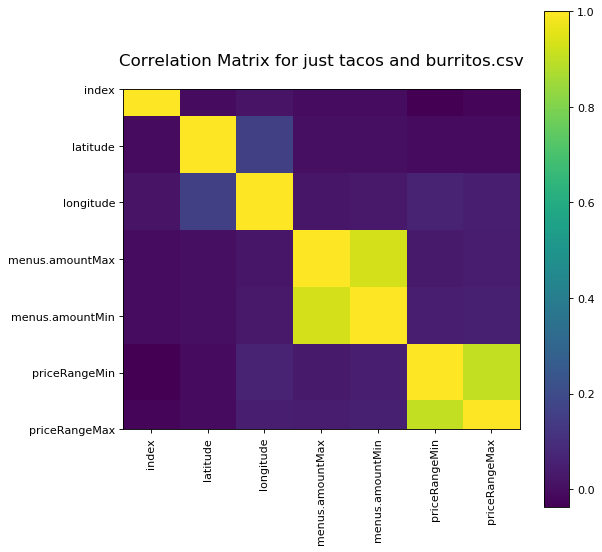

In [21]:
data.dataframeName = 'just tacos and burritos.csv'
plotCorrelationMatrix(data, 8)

In [25]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

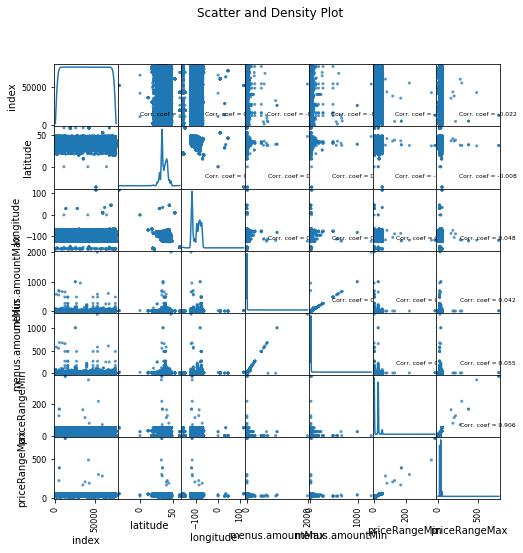

In [26]:
plotScatterMatrix(data, 8, 6)

## Split dataset into four subsets: Metadata, Location, Marketing, Menu

Note: some columns may appear in multiple subsets, e.g. menuPageURL in both "Marketing" and "Menu"

In [71]:
data_dedup = data.groupby('id').nunique()
for col in data_dedup:
    if data_dedup[col].nunique() > 1 and data_dedup[col].value_counts().index.to_list() != [1, 0]:
        print(col)

index
menuPageURL
menus.amountMax
menus.amountMin
menus.category
menus.dateSeen
menus.description
menus.name


In [43]:
data[data['id'] == 'AVzRLkyc-gnIPe8DS05C']

index                    id                address  categories  \
77245  77245  AVzRLkyc-gnIPe8DS05C  3251 20th Ave Ste 182  Restaurant   
77246  77246  AVzRLkyc-gnIPe8DS05C  3251 20th Ave Ste 182  Restaurant   
77247  77247  AVzRLkyc-gnIPe8DS05C  3251 20th Ave Ste 182  Restaurant   
77248  77248  AVzRLkyc-gnIPe8DS05C  3251 20th Ave Ste 182  Restaurant   

                city country cuisines             dateAdded  \
77245  San Francisco      US  Mexican  2017-06-22T19:01:31Z   
77246  San Francisco      US  Mexican  2017-06-22T19:01:31Z   
77247  San Francisco      US  Mexican  2017-06-22T19:01:31Z   
77248  San Francisco      US  Mexican  2017-06-22T19:01:31Z   

                dateUpdated  \
77245  2017-06-22T19:01:31Z   
77246  2017-06-22T19:01:31Z   
77247  2017-06-22T19:01:31Z   
77248  2017-06-22T19:01:31Z   

                                                    keys  ...  \
77245  us/california/sanfrancisco/325120thaveste182/-...  ...   
77246  us/california/sanfrancisco/325120thaveste182/-...  ...   
77247  us/california/sanfrancisco/325120thaveste182/-...  ...   
77248  us/california/sanfrancisco/325120thaveste182/-...  ...   

                 menus.dateSeen  \
77245  2017-06-22T16:39:38.337Z   
77246  2017-06-22T16:39:38.338Z   
77247  2017-06-22T16:39:38.339Z   
77248  2017-06-22T16:39:38.336Z   

                                       menus.description  \
77245                                                NaN   
77246                                                NaN   
77247  soft or crispy. chicken, picadillo beef or car...   
77248                                                NaN   

                    menus.name               name  postalCode  \
77245           Veggie Burrito  Chevy's Fresh Mex  94132-1918   
77246                    Tacos  Chevy's Fresh Mex  94132-1918   
77247                    Tacos  Chevy's Fresh Mex  94132-1918   
77248  Mesquite Fajita Burrito  Chevy's Fresh Mex  94132-1918   

      priceRangeCurrency priceRangeMin priceRangeMax    province websites  
77245                NaN           NaN           NaN  California      NaN  
77246                NaN           NaN           NaN  California      NaN  
77247                NaN           NaN           NaN  California      NaN  
77248                NaN           NaN           NaN  California      NaN  

[4 rows x 27 columns]

### Metadata Analysis (data id, add/update date, keys, etc.)

In [8]:
data_meta = data[['index', 'id', 'dateAdded', 'dateUpdated', 'keys']]
data_meta.head()

index                    id             dateAdded           dateUpdated  \
0      0  AVwc__cikufWRAb51QjV  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z   
1      1  AVwc__cikufWRAb51QjV  2016-03-02T11:49:34Z  2017-02-01T18:04:44Z   
2      2  AVwc__dF_7pvs4fz1Ncy  2016-10-14T01:58:25Z  2016-10-14T01:58:25Z   
3      3  AVwc__kCByjofQCxkdm-  2016-09-09T17:30:34Z  2016-10-04T05:15:17Z   
4      4  AVwc__WtByjofQCxkdkR  2016-05-19T11:50:25Z  2016-09-11T00:06:37Z   

                                                keys  
0          us/ks/atchison/610commercialst/-138126000  
1          us/ks/atchison/610commercialst/-138126000  
2  us/grayson/patterson/9521mortondavisdr/-522005016  
3  us/niwot/longmont/10550wi25frontagerd/-1161002137  
4   us/bicentennial/losangeles/8495w3rdst/-251199537

### Location Analysis (Only 1 country (US) included, hence drop that columns as it is trivial)

In [10]:
data_location = data[['index', 'id', 'name', 'province', 'city', 'address', 'postalCode', 'latitude', 'longitude', 'keys']]
data_location.head()

index                    id      province         city  \
0      0  AVwc__cikufWRAb51QjV            KS     Atchison   
1      1  AVwc__cikufWRAb51QjV            KS     Atchison   
2      2  AVwc__dF_7pvs4fz1Ncy       Grayson    Patterson   
3      3  AVwc__kCByjofQCxkdm-         Niwot     Longmont   
4      4  AVwc__WtByjofQCxkdkR  Bicentennial  Los Angeles   

                    address postalCode   latitude   longitude  \
0         610 Commercial St      66002  39.561570  -95.121020   
1         610 Commercial St      66002  39.561570  -95.121020   
2      9521 Morton Davis Dr      95363  37.401855 -121.266703   
3  10550 W I 25 Frontage Rd      80504        NaN         NaN   
4             8495 W 3rd St      90048  34.080724 -118.389578   

                                                keys  
0          us/ks/atchison/610commercialst/-138126000  
1          us/ks/atchison/610commercialst/-138126000  
2  us/grayson/patterson/9521mortondavisdr/-522005016  
3  us/niwot/longmont/10550wi25frontagerd/-1161002137  
4   us/bicentennial/losangeles/8495w3rdst/-251199537

In [41]:
data_location.to_csv('data_location.csv', index=False)

### Marketing

In [29]:
data_marketing = data[['index', 'id', 'menuPageURL', 'websites']]
data_marketing.head()

index                    id  \
0      0  AVwc__cikufWRAb51QjV   
1      1  AVwc__cikufWRAb51QjV   
2      2  AVwc__dF_7pvs4fz1Ncy   
3      3  AVwc__kCByjofQCxkdm-   
4      4  AVwc__WtByjofQCxkdkR   

                                         menuPageURL  \
0  http://www.yellowpages.com/atchison-ks/mip/gam...   
1  http://www.yellowpages.com/atchison-ks/mip/gam...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                       websites  
0  http://www.gambinospizza.com  
1  http://www.gambinospizza.com  
2  http://www.diablogrande.com/  
3          http://mcdonalds.com  
4          http://bajafresh.com

### Menu

In [30]:
data_menu = data[['index', 'id', 'name', 'categories', 'cuisines',
                  'menus.amountMax', 'menus.amountMin', 'menus.category', 'menus.currency', 'menus.dateSeen', 'menus.description', 'menus.name',
                  'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax'
                 ]]
data_menu.head()

index                    id                               name  \
0      0  AVwc__cikufWRAb51QjV                    Gambino's Pizza   
1      1  AVwc__cikufWRAb51QjV                    Gambino's Pizza   
2      2  AVwc__dF_7pvs4fz1Ncy  Diablo Grande Golf & Country Club   
3      3  AVwc__kCByjofQCxkdm-                         Mcdonald's   
4      4  AVwc__WtByjofQCxkdkR           Baja Fresh Mexican Grill   

                                          categories  \
0  Restaurant Delivery Service,Restaurants,Pizza,...   
1  Restaurant Delivery Service,Restaurants,Pizza,...   
2       Golf Course, American Restaurant, and Resort   
3                               Fast Food Restaurant   
4  Mexican Restaurant Mid-City West,Mexican Resta...   

                      cuisines  menus.amountMax  menus.amountMin  \
0  Restaurant Delivery Service              NaN              NaN   
1  Restaurant Delivery Service              NaN              NaN   
2                          NaN              NaN              NaN   
3                          NaN              NaN              NaN   
4                      Mexican              NaN              NaN   

  menus.category menus.currency        menus.dateSeen  \
0            NaN            NaN  2017-02-01T18:04:44Z   
1            NaN            NaN  2016-03-02T11:49:34Z   
2            NaN            NaN  2016-10-14T01:58:25Z   
3            NaN            NaN  2016-09-09T17:30:34Z   
4            NaN            NaN  2016-05-19T11:50:25Z   

                                   menus.description         menus.name  \
0                                                NaN               Taco   
1  Beef, onion, cheddar cheese, lettuce,  refried...               Taco   
2  Beef barbacoa or chicken, spanish rice, pico d...   Smotherd Burrito   
3                                                NaN    Sausage Burrito   
4  Wahoo, avocado, cabbage, pico de gallo  and av...  Wahoo Tacogrilled   

  priceRangeCurrency  priceRangeMin  priceRangeMax  
0                NaN            NaN            NaN  
1                NaN            NaN            NaN  
2                NaN            NaN            NaN  
3                NaN            NaN            NaN  
4                USD            0.0           25.0

In [62]:
data_num_desc = data.describe()
data_num_desc

latitude     longitude  menus.amountMax  menus.amountMin  \
count  55636.000000  55636.000000     40260.000000     40260.000000   
mean      36.694846    -98.713309         8.754767         8.611666   
std        4.835124     18.245857        18.408596        15.708317   
min      -31.986438   -159.492690         0.000000         0.000000   
25%       33.668355   -117.647150         5.000000         5.000000   
50%       36.047195    -96.682320         7.950000         7.950000   
75%       40.588380    -82.679930        10.500000        10.390000   
max       61.219460    115.903696      1990.000000      1290.000000   

       priceRangeMin  priceRangeMax  
count   48159.000000   48159.000000  
mean       13.734837      33.722627  
std        14.704344      10.395812  
min         0.000000       5.000000  
25%         0.000000      25.000000  
50%        25.000000      40.000000  
75%        25.000000      40.000000  
max       378.000000     755.000000

In [36]:
pd.DataFrame(data['province'].value_counts()).head(100)

province
CA                               23664
TX                                6099
FL                                2977
IL                                2725
AZ                                2355
NY                                2290
GA                                1816
CO                                1485
MA                                1407
NC                                1396
OR                                1229
VA                                1226
MI                                1108
OH                                1024
WA                                1008
TN                                1005
NV                                 994
PA                                 970
NJ                                 913
OK                                 845
MD                                 798
IN                                 780
NM                                 769
WI                                 746
MN                                 691
MO                                 680
LA                                 613
CT                                 593
AL                                 576
UT                                 547
KS                                 520
SC                                 515
Nyc                                508
IA                                 492
ID                                 438
AR                                 427
KY                                 417
NH                                 348
DC                                 328
MS                                 327
Manhattan                          295
NE                                 271
California                         243
RI                                 239
DE                                 157
MT                                 147
WV                                 145
WY                                 144
HI                                 139
SD                                 118
ME                                 114
La Habra Hts                        74
Olivenhain                          73
Palm Springs Municipal Airpo        71
New York City                       63
Wla                                 62
AK                                  57
ND                                  56
Lake Forest                         54
Salt Lake Cty                       50
Venetian Islands                    50
Playa Vista                         47
Ny City                             47
Williams Crk                        45
Hono                                44
Rehoboth                            41
Bicentennial                        41
Village Of Wellington               41
Toluca Terrace                      39
Paradise Park                       39
Portola Hills                       38
Seacliff                            36
Lake Mary                           36
Santa Barbara                       36
Magnolia                            35
West Point                          35
Edendale                            35
Georgia State University            34
Prairie Vlg                         34
West Pittsburg                      34
Parkside                            33
Lindenwold                          33
Smiley Heights                      33
Pitt                                32
Mphs                                31
Pritchardville                      31
Harrisburg Junction                 30
Chupadero                           30
Manhattanville                      30
Los Feliz                           30
Glendale                            29
Saint Francis                       29
Heritage Rnch                       29
Los Ranchos De Abq                  29
Carson Colony                       29
Ronkonkoma                          28
Los Angeles                         28
Fairhaven                           28
No Bethesda                         28
Naples                              28

In [39]:
GSU = data[data['province'] == 'Georgia State University']
GSU['menus.name'].value_counts()

Fish Soft Taco                      2
Steak Taco                          2
Bbq Pork Taco                       2
Pork Taco                           2
Steak Burrito                       2
Chicken Burrito                     2
Pork Burrito                        2
Fish Taco                           2
Mongolian Beef Soft Taco            2
Chicken Taco                        2
Ahi Tuna Tacos                      1
Grilled Shrimp Taco                 1
Fried Chicken Taco                  1
Smoked Brisket Taco                 1
Taco Platter                        1
Blackened Fish Taco                 1
Lamb Barbacoa Taco                  1
Grande Breakfast Burrito            1
Grilled Steak Tacos                 1
Grilled Salsa Verde Shrimp Tacos    1
Fried Avocado Tacos                 1
Carnitas Tacos                      1
Crispy Cod Tacos                    1
Masa Fried Shrimp Tacos             1
Name: menus.name, dtype: int64

In [65]:
def plotColumnDistribution(df, col):
    nunique = df[col].nunique()
    print(f'Column {col} has {nunique} unique values.')
    plt.figure(num = None, figsize = (6, 8), dpi = 300, facecolor = 'w', edgecolor = 'k')
    if (not np.issubdtype(type(df[col][0]), np.number)):
        valueCounts = df[col].value_counts()
        valueCounts.plot.bar()
    else:
        df[col].hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'Column: {col}')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Column province has 1097 unique values.


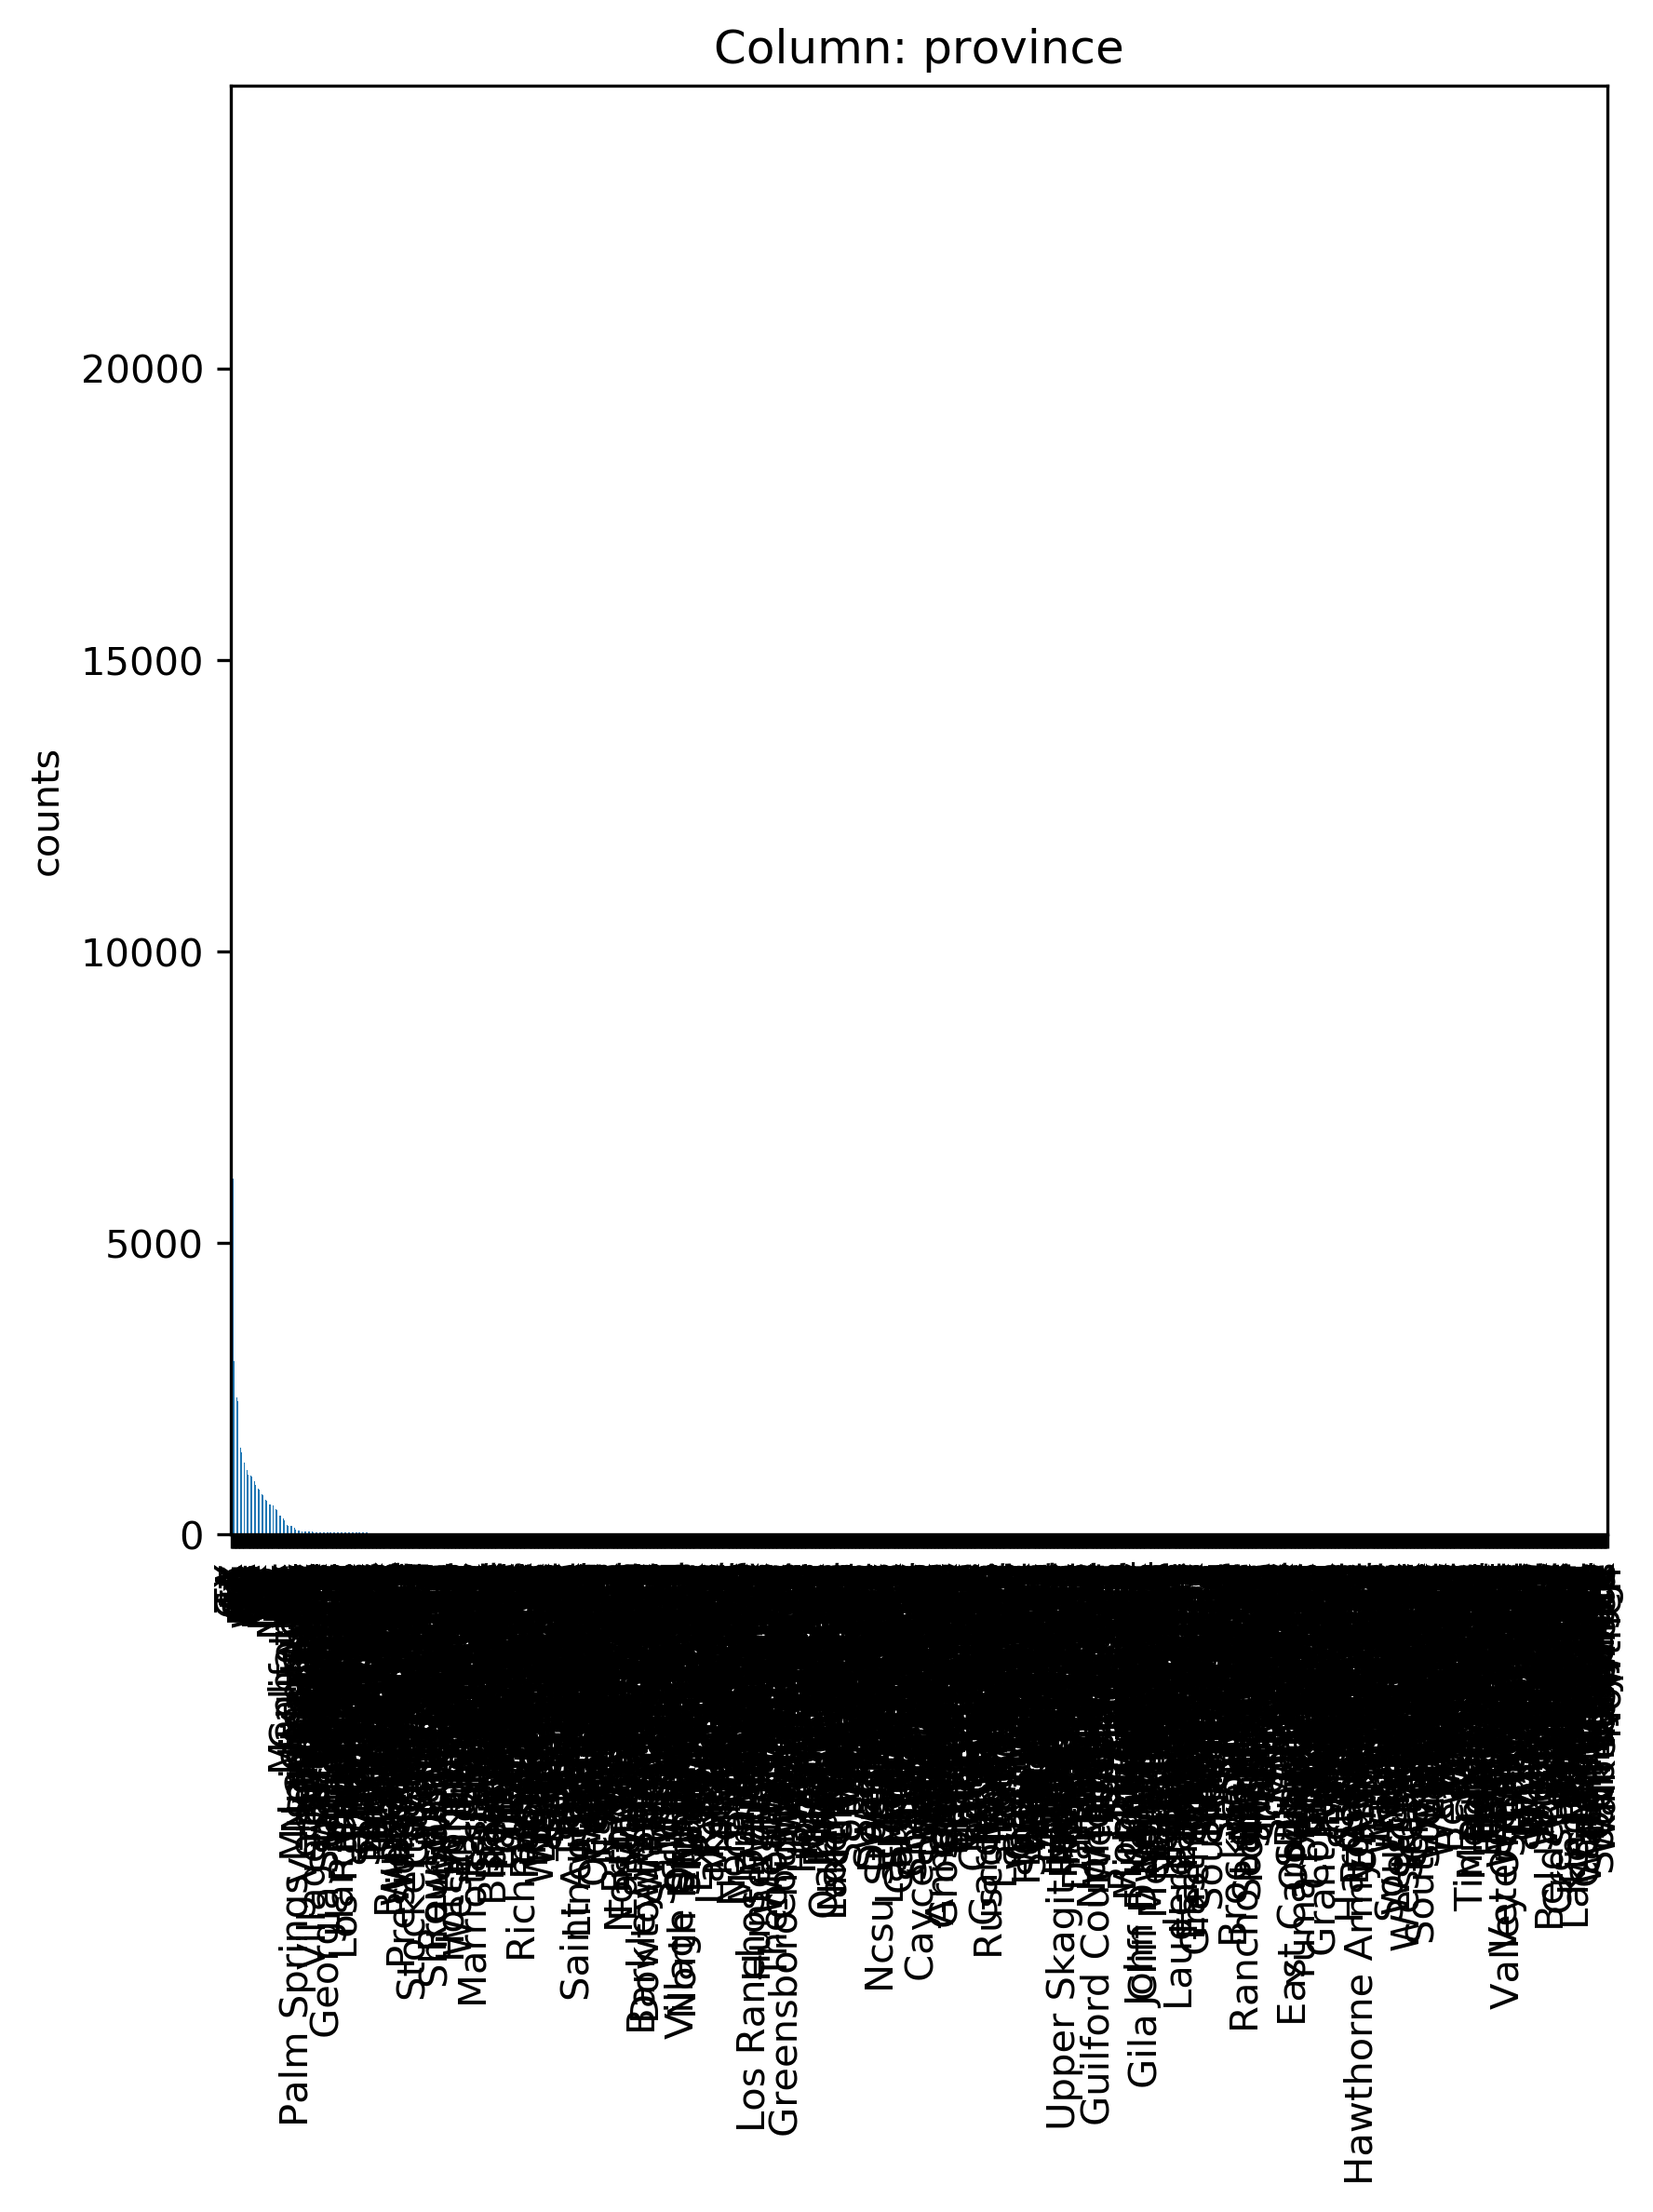

In [66]:
plotColumnDistribution(data, 'province')